## Quantum Game Theory
This notebook demonstrates how to simulate the quantum version of the Prisoners dilemma with Quantum_Games. With slight modification the toolset in Quantum_Games can be used to play any quantum game, with any number of players, with any strategy, on any quantum platform.

### Step 1: Define strategies
First, we need to define a set of quantum gates that our players will choose from when they play a game. Here we define the classical_cooperate and classical_defect gates which are equivalent to the classical prisoner's dilemma options of cooperate or defect. We also define two quantum strategies, which we call quantum_cooperate and quantum_defect.

In [1]:
from qiskit.circuit.library import UnitaryGate

classical_cooperate = UnitaryGate([[1, 0], 
                                   [0, 1]])
quantum_cooperate = UnitaryGate([[1j, 0], 
                                 [0, -1j]])
classical_defect = UnitaryGate([[0, 1], 
                                [-1, 0]])
quantum_defect = UnitaryGate([[0, -1j],
                              [-1j, 0]])

### Step 2: Define players

Our demonstration will be between two players, Alice and Bob. Alice is going to play the classical_defect strategy, which corresponds to the classical Nash equilibrium. Bob is going to play the quantum_cooperate strategy. The number of strategies and probability of each strategy can be customized to explore mixed quantum strategies.

In [30]:
from Quantum_Games import player

alice = player(name='alice', 
               strategies=[classical_defect],
               probabilities=[1])
bob = player(name='bob', 
             strategies=[quantum_cooperate],
             probabilities=[1])

### Step 3: Create Game circuit

The game_circuit function constructs a quantum game circuit based on one strategy chosen by the provided players. If you rerun the cell, the gates between the first and second barrier may change depending on the random choice of each player. 

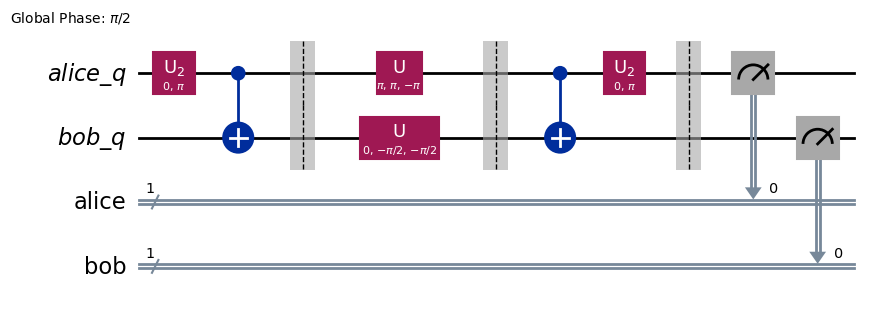

In [31]:
from Quantum_Games import game_circuit

circuit = game_circuit(players=[alice, bob], insert_barriers=True)
circuit.decompose(reps=1).draw('mpl')

### Step 4: Get a circuit result

Next we need to play the game. The user can define any function that inputs a circuit and outputs the measurement results, which can be copied from the basic tutorial of any quantum platform. For testing purposes, we can use the noiseless aer simulator.

In [32]:
from Quantum_Games import get_aer_result

result = get_aer_result(circuit)
print(result)

   alice  bob
0      0    1
1      0    1
2      0    1
3      0    1
4      0    1
5      0    1
6      0    1
7      0    1
8      0    1
9      0    1


In [33]:
from Quantum_Games import matrix_payoff_calculator
import numpy as np

payoff_matrix = np.array([[(-1, -1), (-3,0)],
                          [(0,-3), (-2,-2)]])

player_results = matrix_payoff_calculator(result, payoff_matrix)

print('Alice average result: ', np.mean(player_results['alice']))
print('Bob average result: ', np.mean(player_results['bob']))

Alice average result:  -3.0
Bob average result:  0.0
